In [1]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.5 MB/s eta 0:00:00


In [2]:
!pip install python-dotenv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install -U langchain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 6.4 MB/s eta 0:00:00


In [8]:
!pip install docarray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.8/220.8 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 17.8 MB/s eta 0:00:00


In [18]:
!pip install docarray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.4 MB/s eta 0:00:00


In [4]:
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())  # read local .env file


We can use this function to download a pandas dataframe df from
online Jupyter notebook to a local csv file provided file is not too large

https://stackoverflow.com/questions/31893930/download-csv-from-an-ipython-notebook

```python
import base64
import pandas as pd
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "OutdoorClothingCatalog_1000.csv"):
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

file = 'OutdoorClothingCatalog_1000.csv'
df = pd.read_csv(file)
df
create_download_link(df)
```

 A download hyperlink will appear, simply click to download the csv file locally.

 This can be done to download the dataframe `df` from the Jupyter IPython notebook session into a local csv file from

 https://learn.deeplearning.ai/langchain/lesson/5/question-and-answer

In [13]:
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import CSVLoader
from langchain.vectorstores import DocArrayInMemorySearch
from IPython.display import display, Markdown

Upload `OutdoorClothingCatalog_1000.csv` into our local Colab Session

In [15]:
file = 'OutdoorClothingCatalog_1000.csv'
loader = CSVLoader(file_path=file)

In [16]:
loader

In [19]:
from langchain.indexes import VectorstoreIndexCreator
index = VectorstoreIndexCreator(
    vectorstore_cls=DocArrayInMemorySearch).from_loaders([loader])

In [20]:
query = "Please list all your shirts with sun protection \
in a table in markdown and summarize each one."

response = index.query(query)

In [22]:
display(Markdown(response))



| Name | Description |
| --- | --- |
| Men's Tropical Plaid Short-Sleeve Shirt | UPF 50+ rated, 100% polyester, wrinkle-resistant, front and back cape venting, two front bellows pockets |
| Men's Plaid Tropic Shirt, Short-Sleeve | UPF 50+ rated, 52% polyester and 48% nylon, machine washable and dryable, front and back cape venting, two front bellows pockets |
| Men's TropicVibe Shirt, Short-Sleeve | UPF 50+ rated, 71% Nylon, 29% Polyester, 100% Polyester knit mesh, machine wash and dry, front and back cape venting, two front bellows pockets |
| Sun Shield Shirt by | UPF 50+ rated, 78% nylon, 22% Lycra Xtra Life fiber, handwash, line dry, wicks moisture, fits comfortably over swimsuit, abrasion resistant |

All four shirts provide UPF 50+ sun protection, blocking 98% of the sun's harmful rays. The Men's Tropical Plaid Short-Sleeve Shirt is made of 100% polyester and is wrinkle-resistant

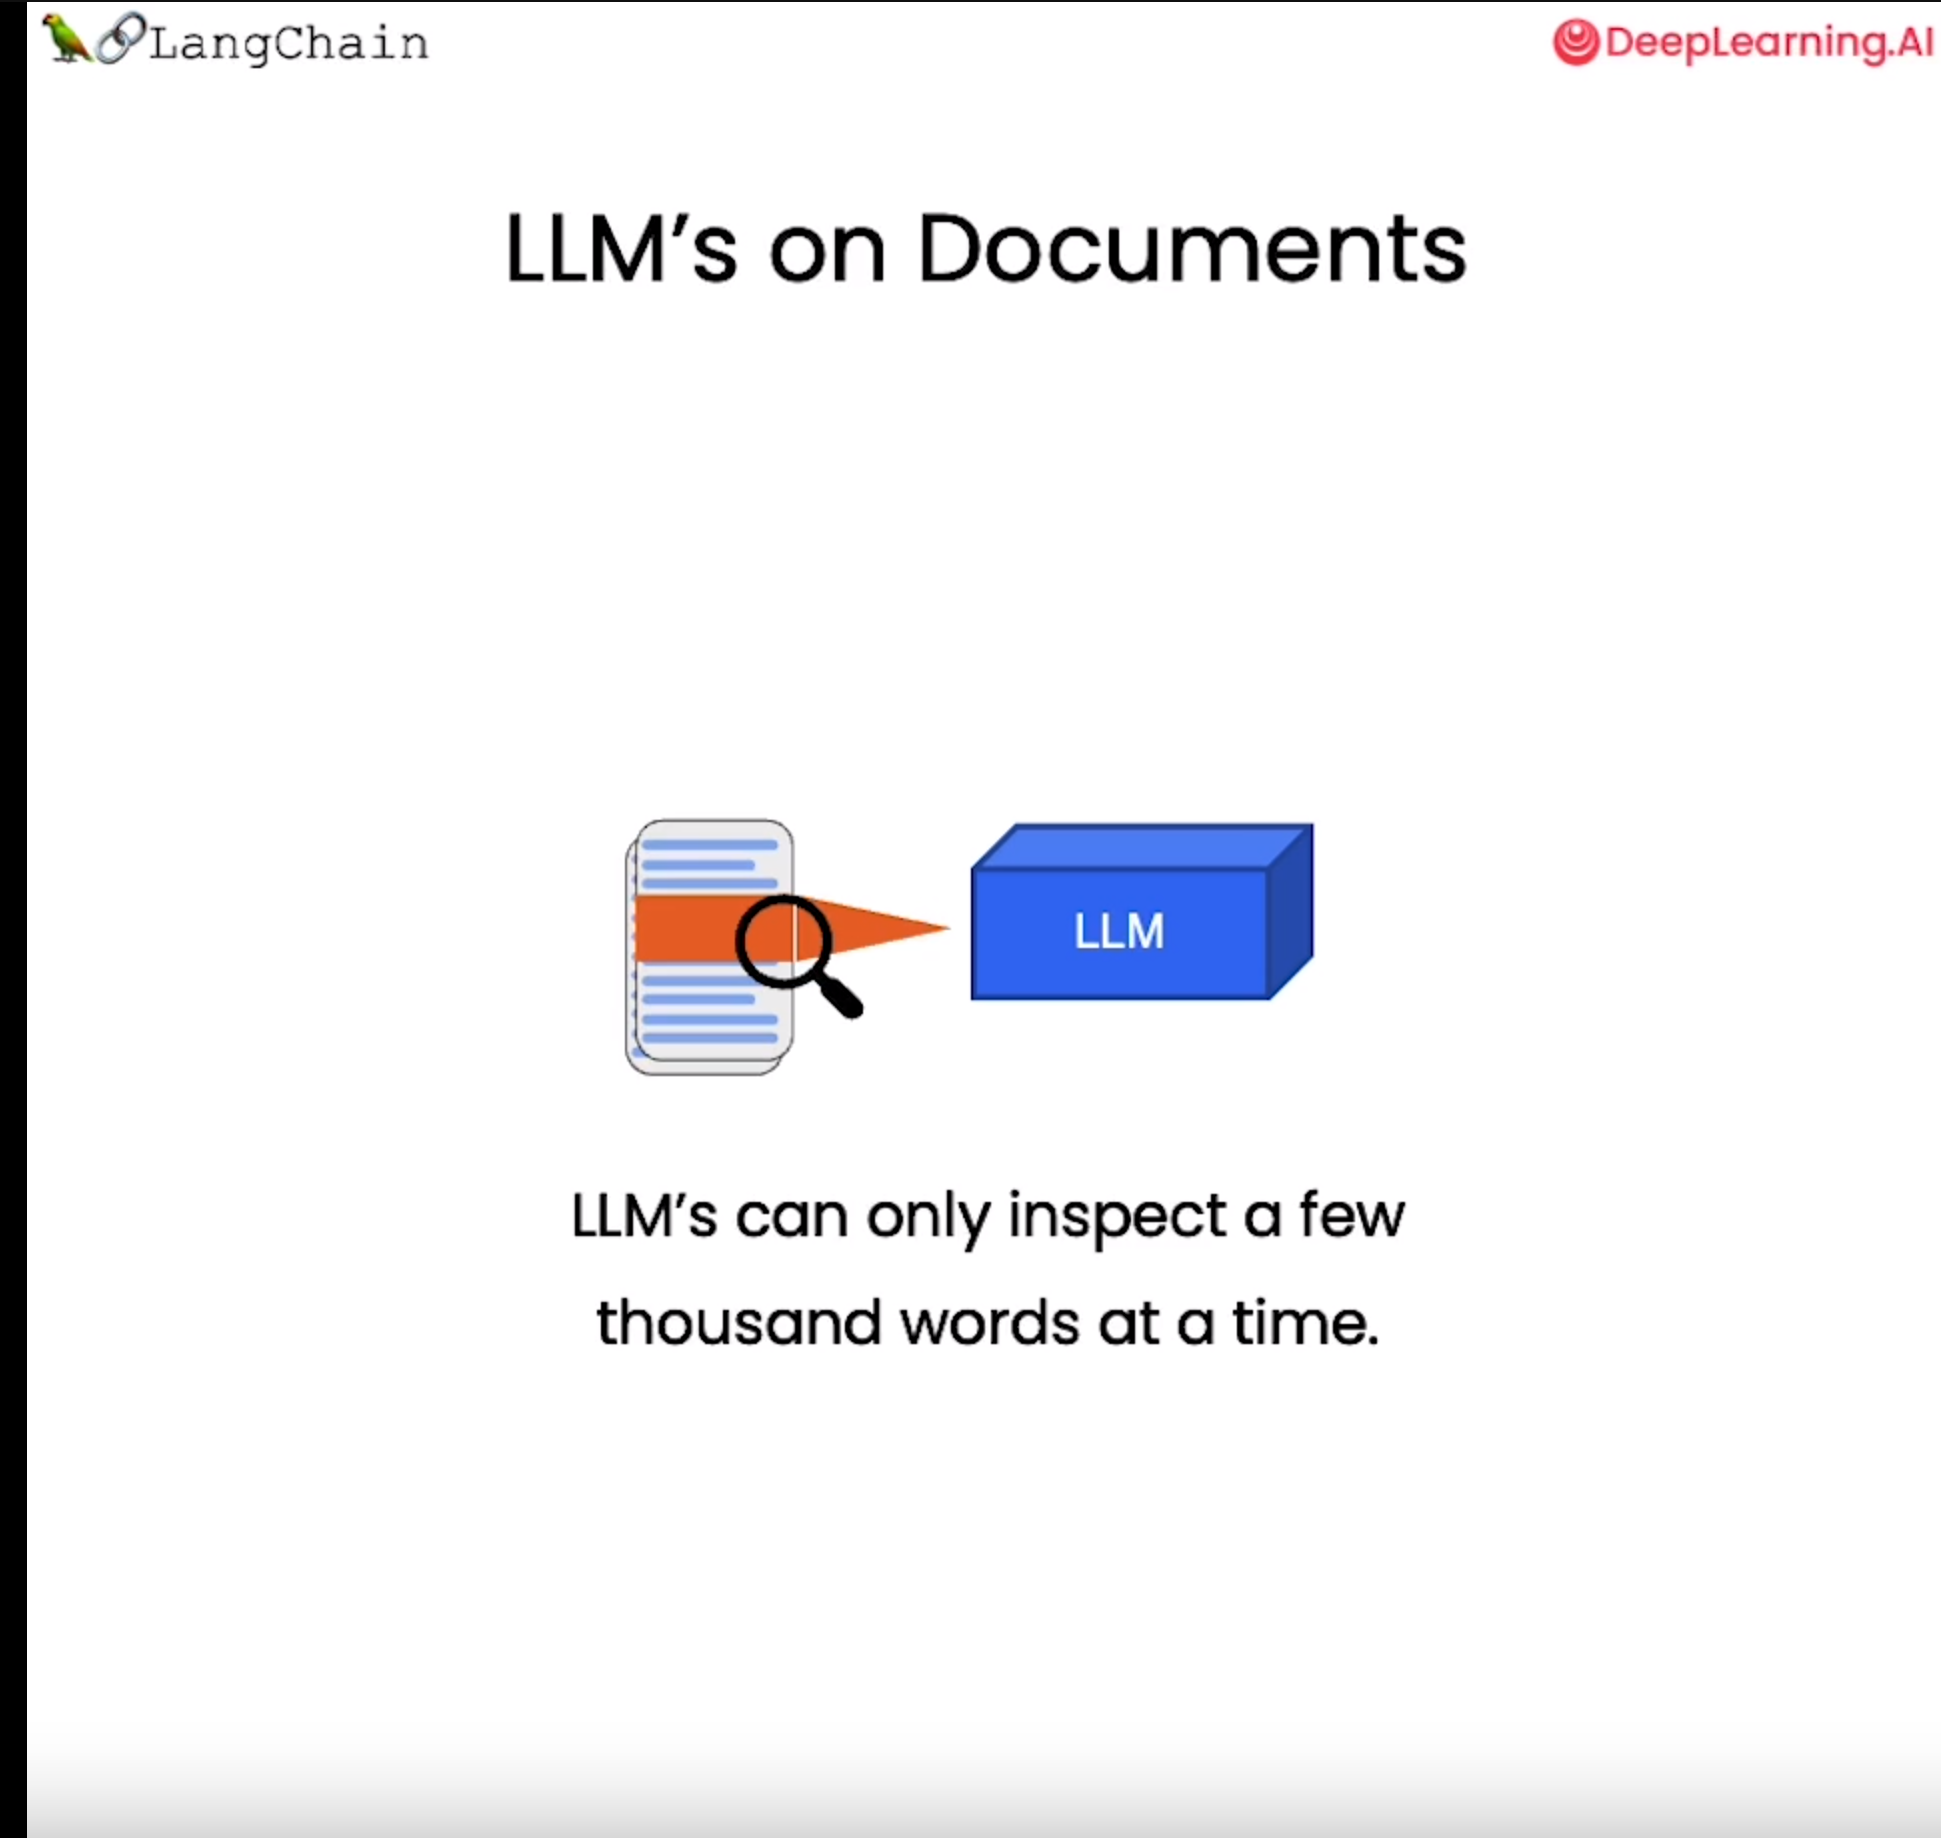

In [23]:
loader = CSVLoader(file_path=file)
docs = loader.load()
docs[0]

Document(page_content=": 0\nname: Women's Campside Oxfords\ndescription: This ultracomfortable lace-to-toe Oxford boasts a super-soft canvas, thick cushioning, and quality construction for a broken-in feel from the first time you put them on. \n\nSize & Fit: Order regular shoe size. For half sizes not offered, order up to next whole size. \n\nSpecs: Approx. weight: 1 lb.1 oz. per pair. \n\nConstruction: Soft canvas material for a broken-in feel and look. Comfortable EVA innersole with Cleansport NXT® antimicrobial odor control. Vintage hunt, fish and camping motif on innersole. Moderate arch contour of innersole. EVA foam midsole for cushioning and support. Chain-tread-inspired molded rubber outsole with modified chain-tread pattern. Imported. \n\nQuestions? Please contact us for any inquiries.", metadata={'source': 'OutdoorClothingCatalog_1000.csv', 'row': 0})

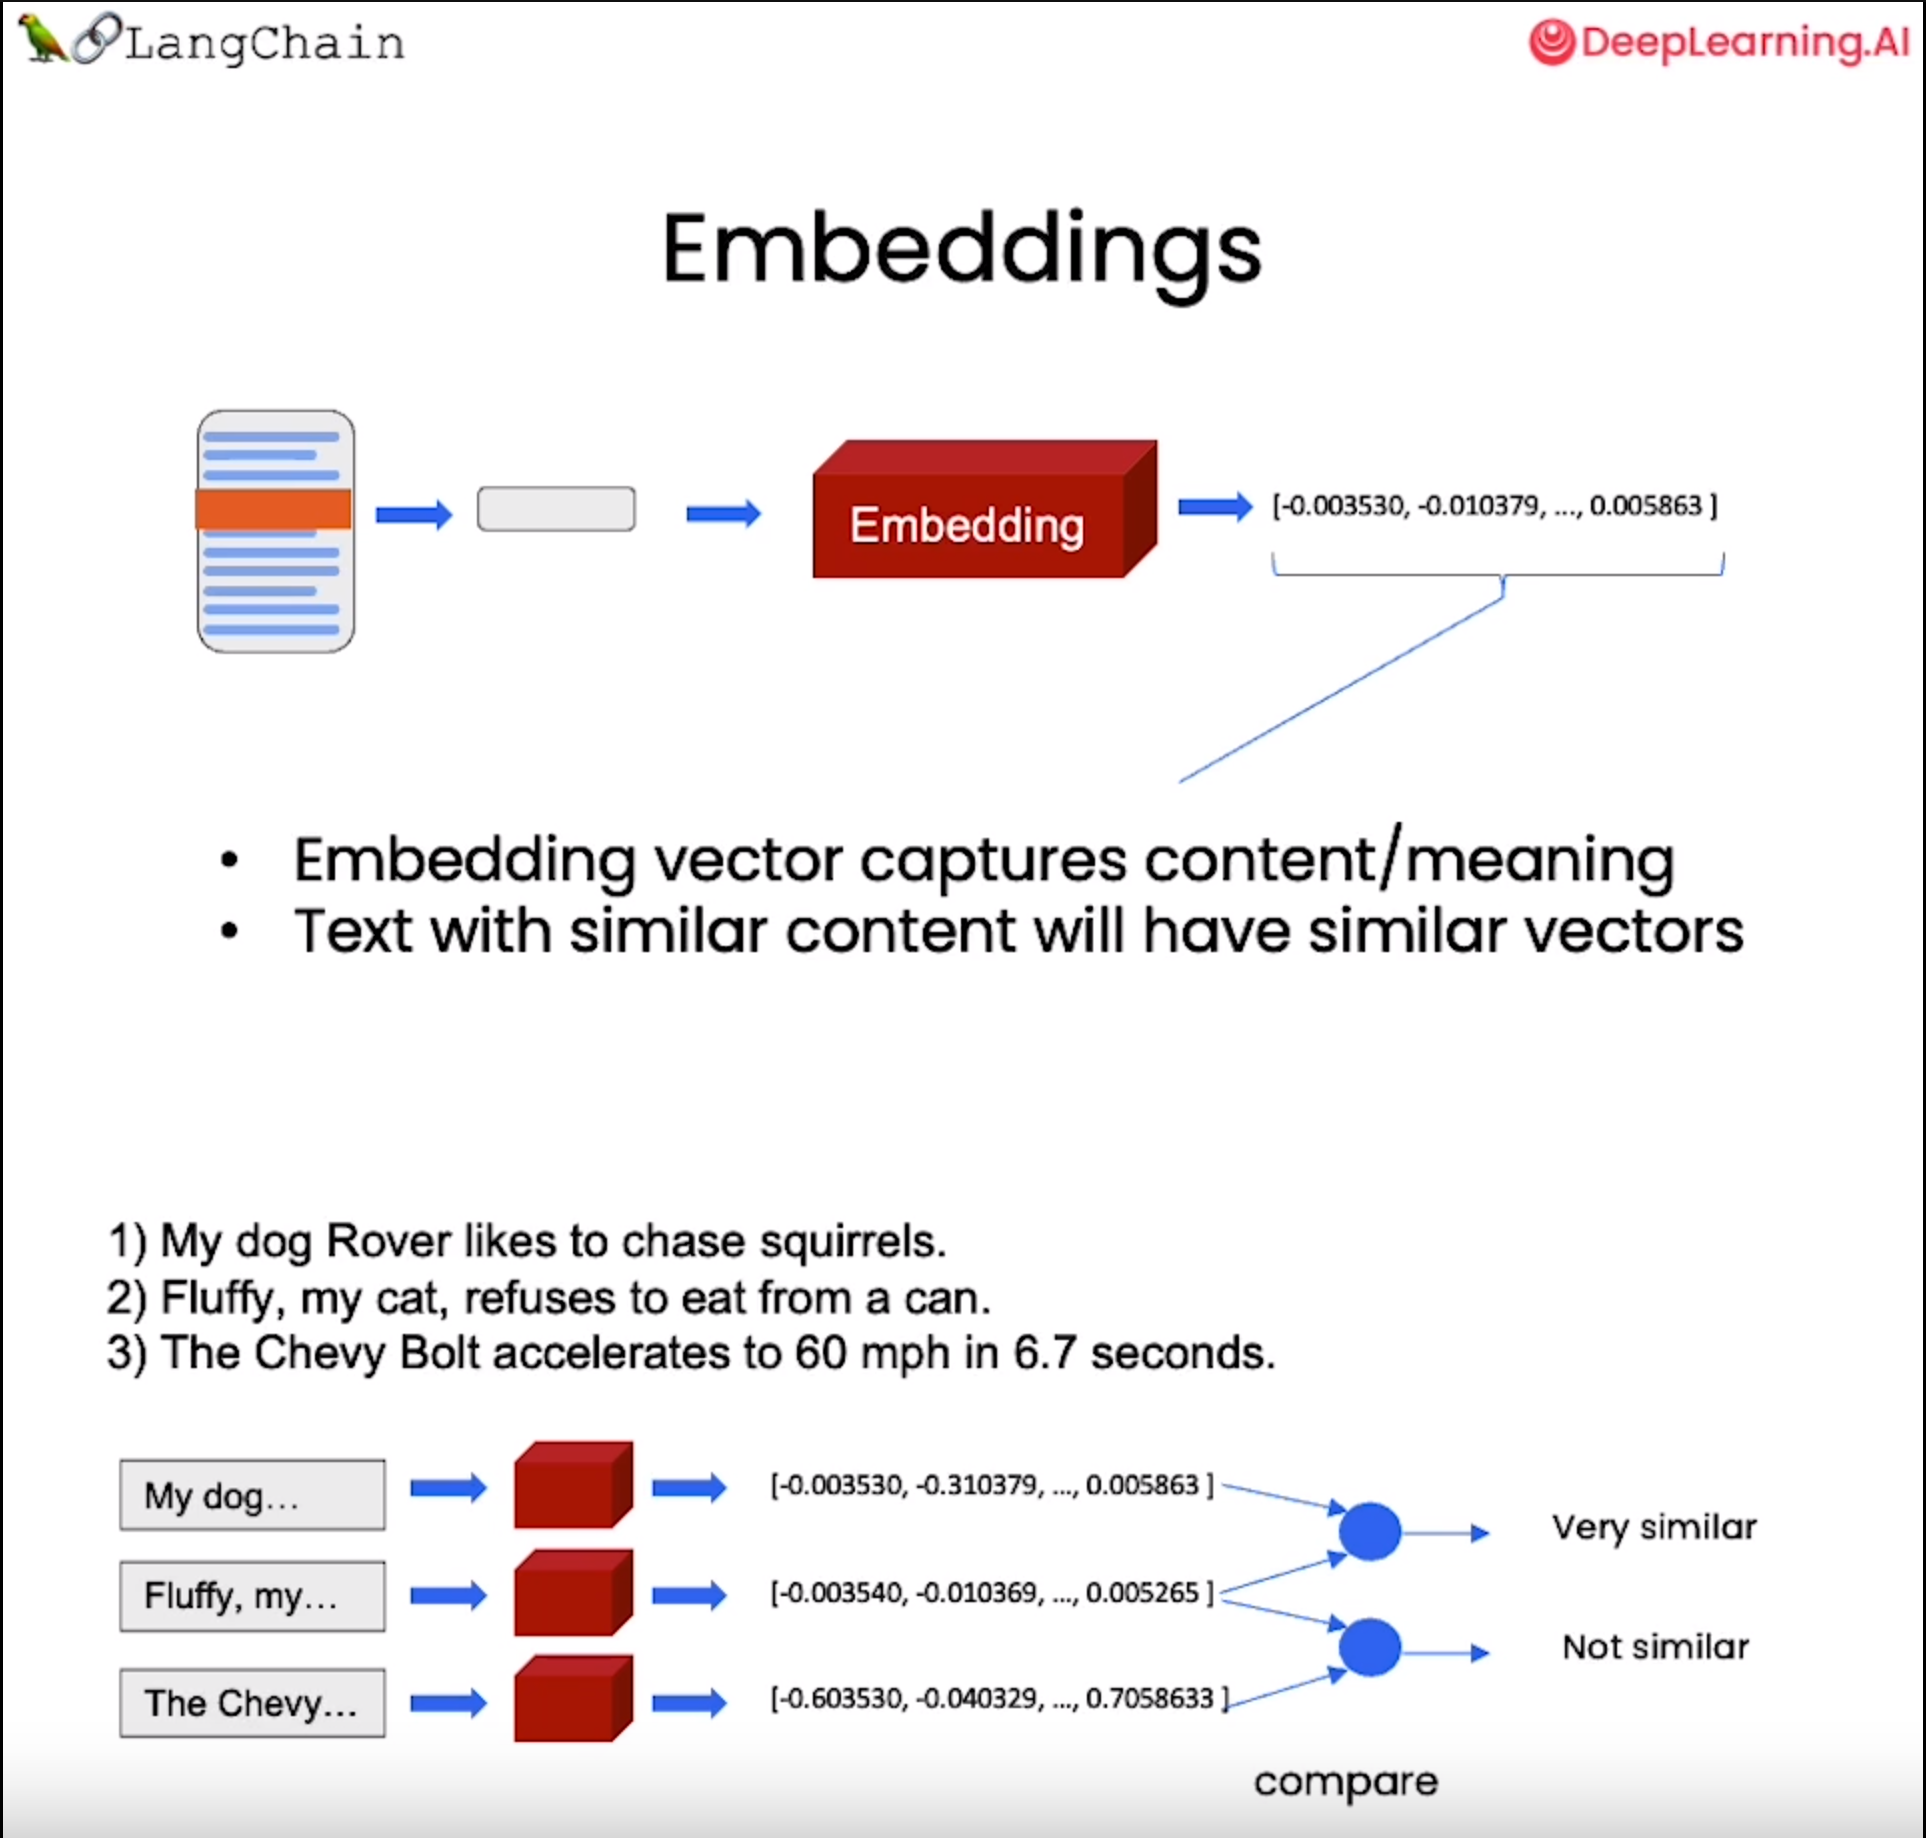

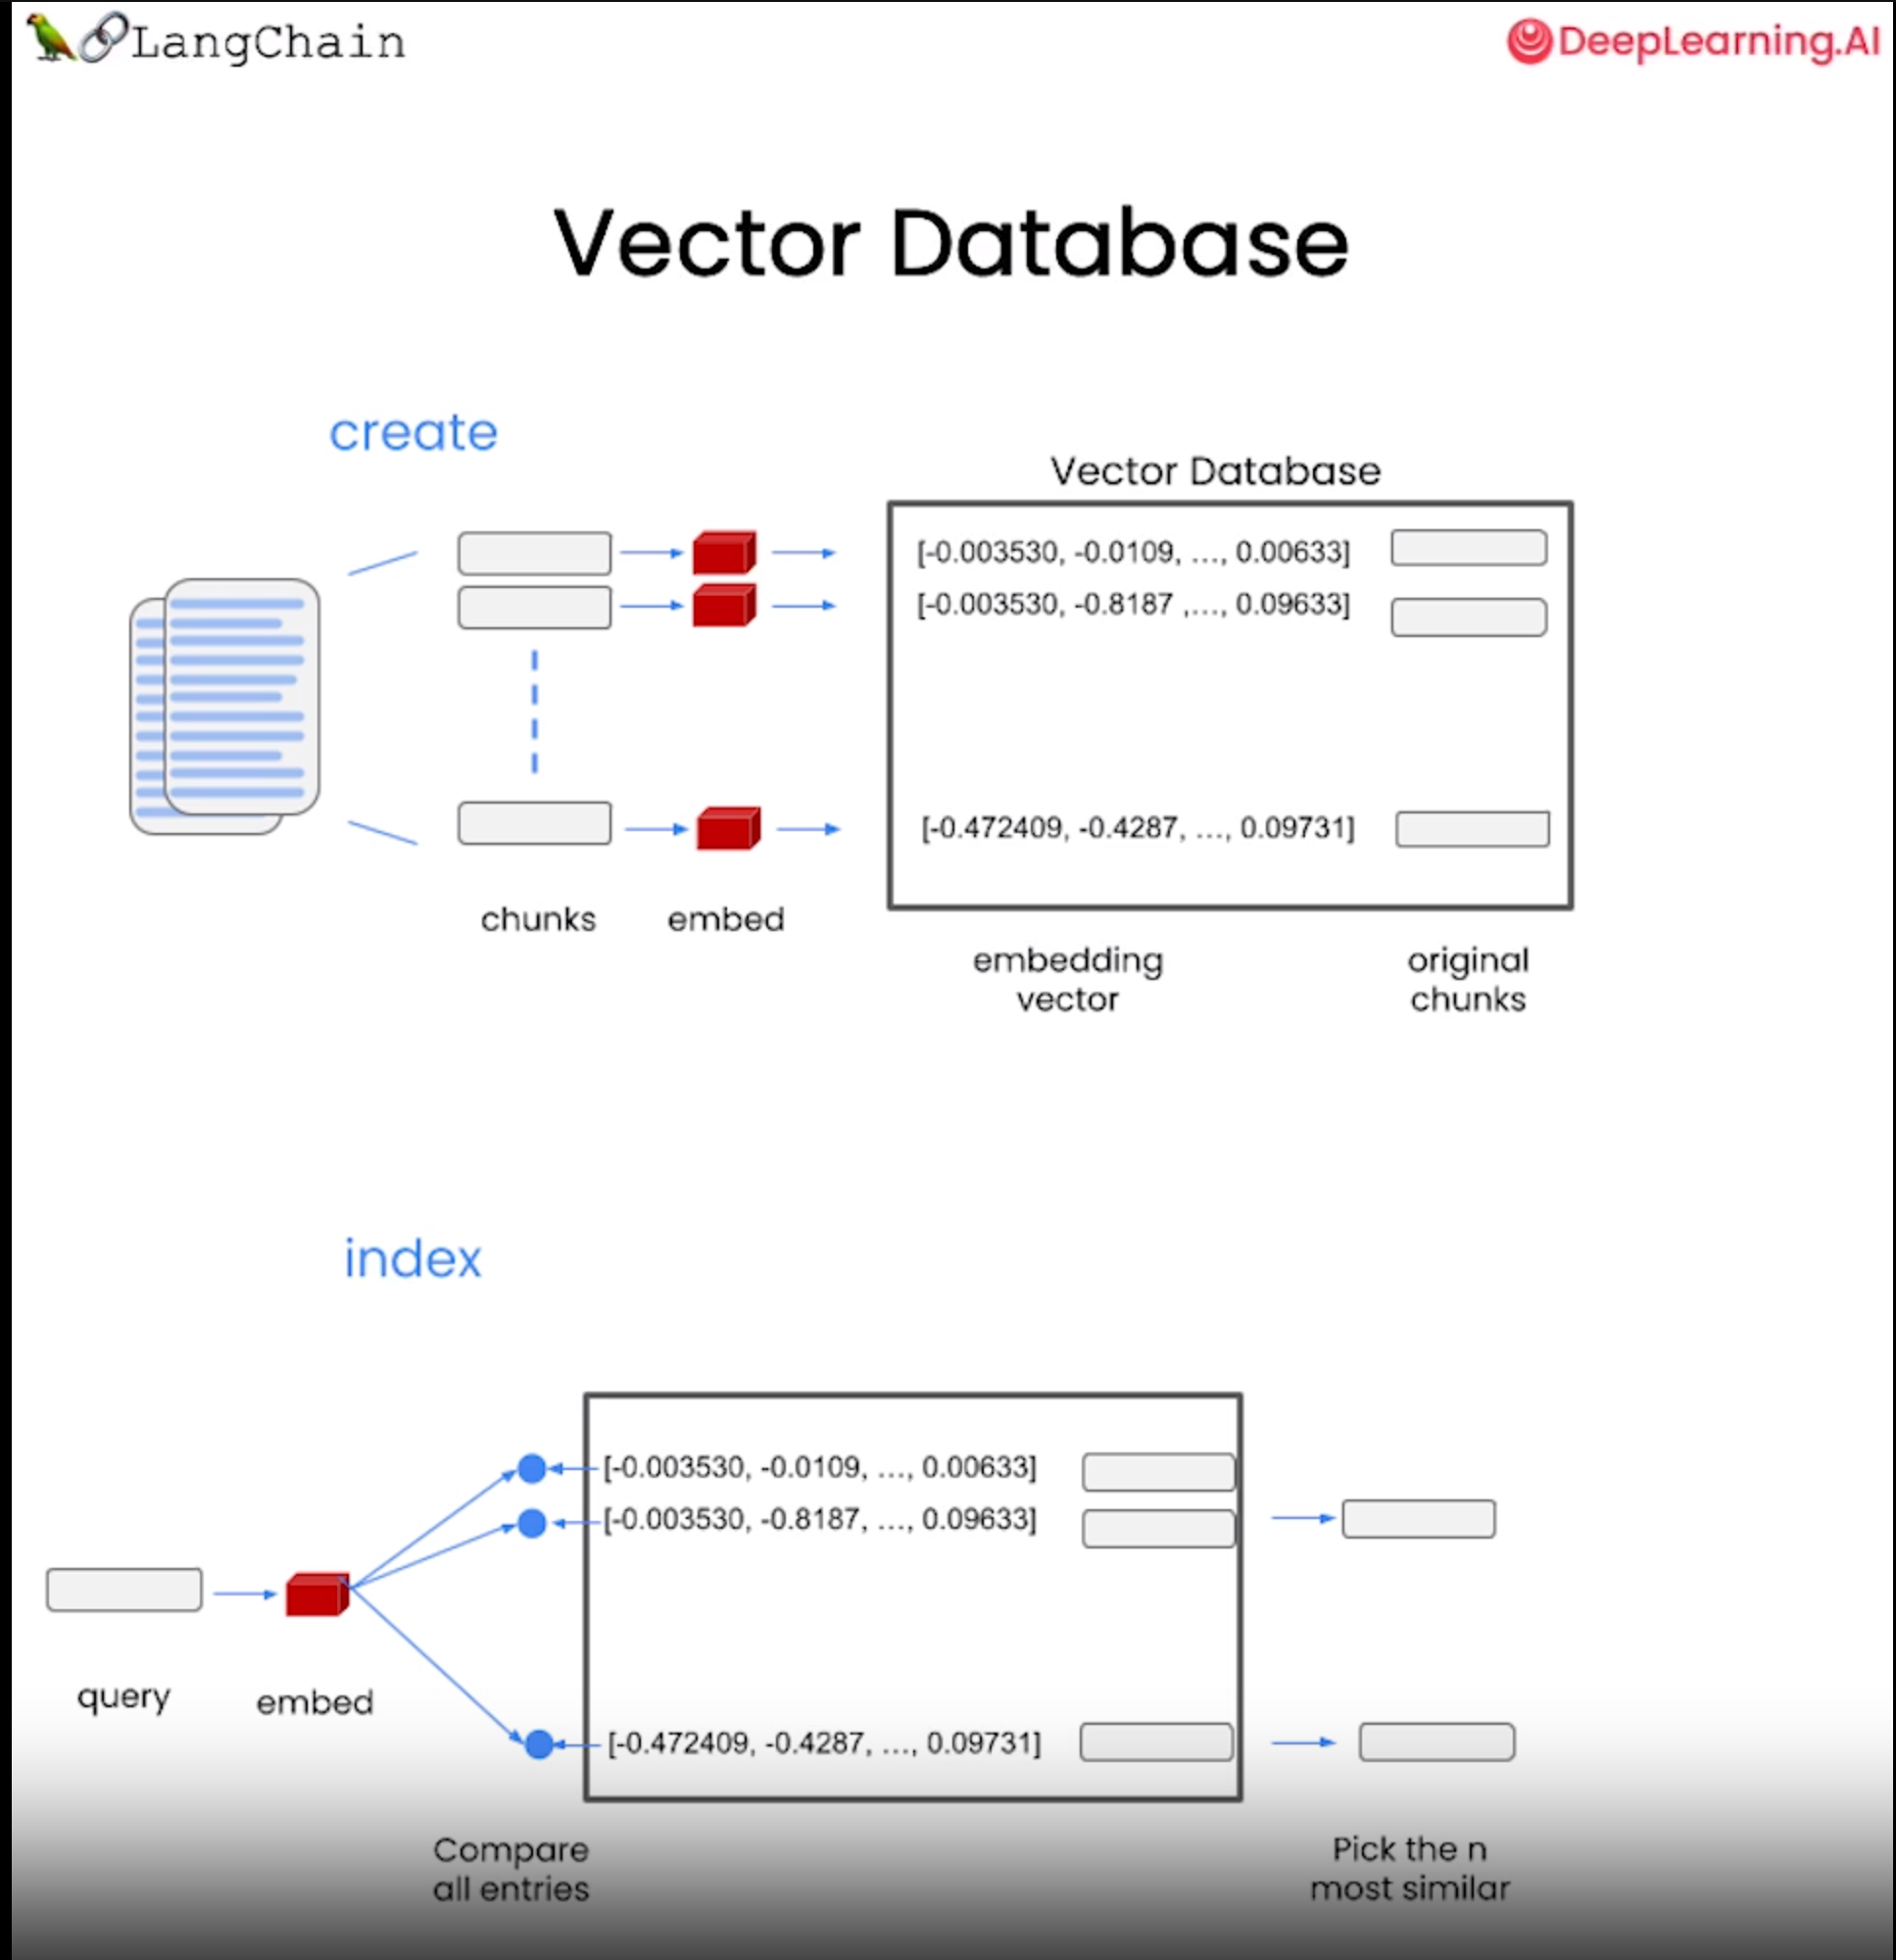

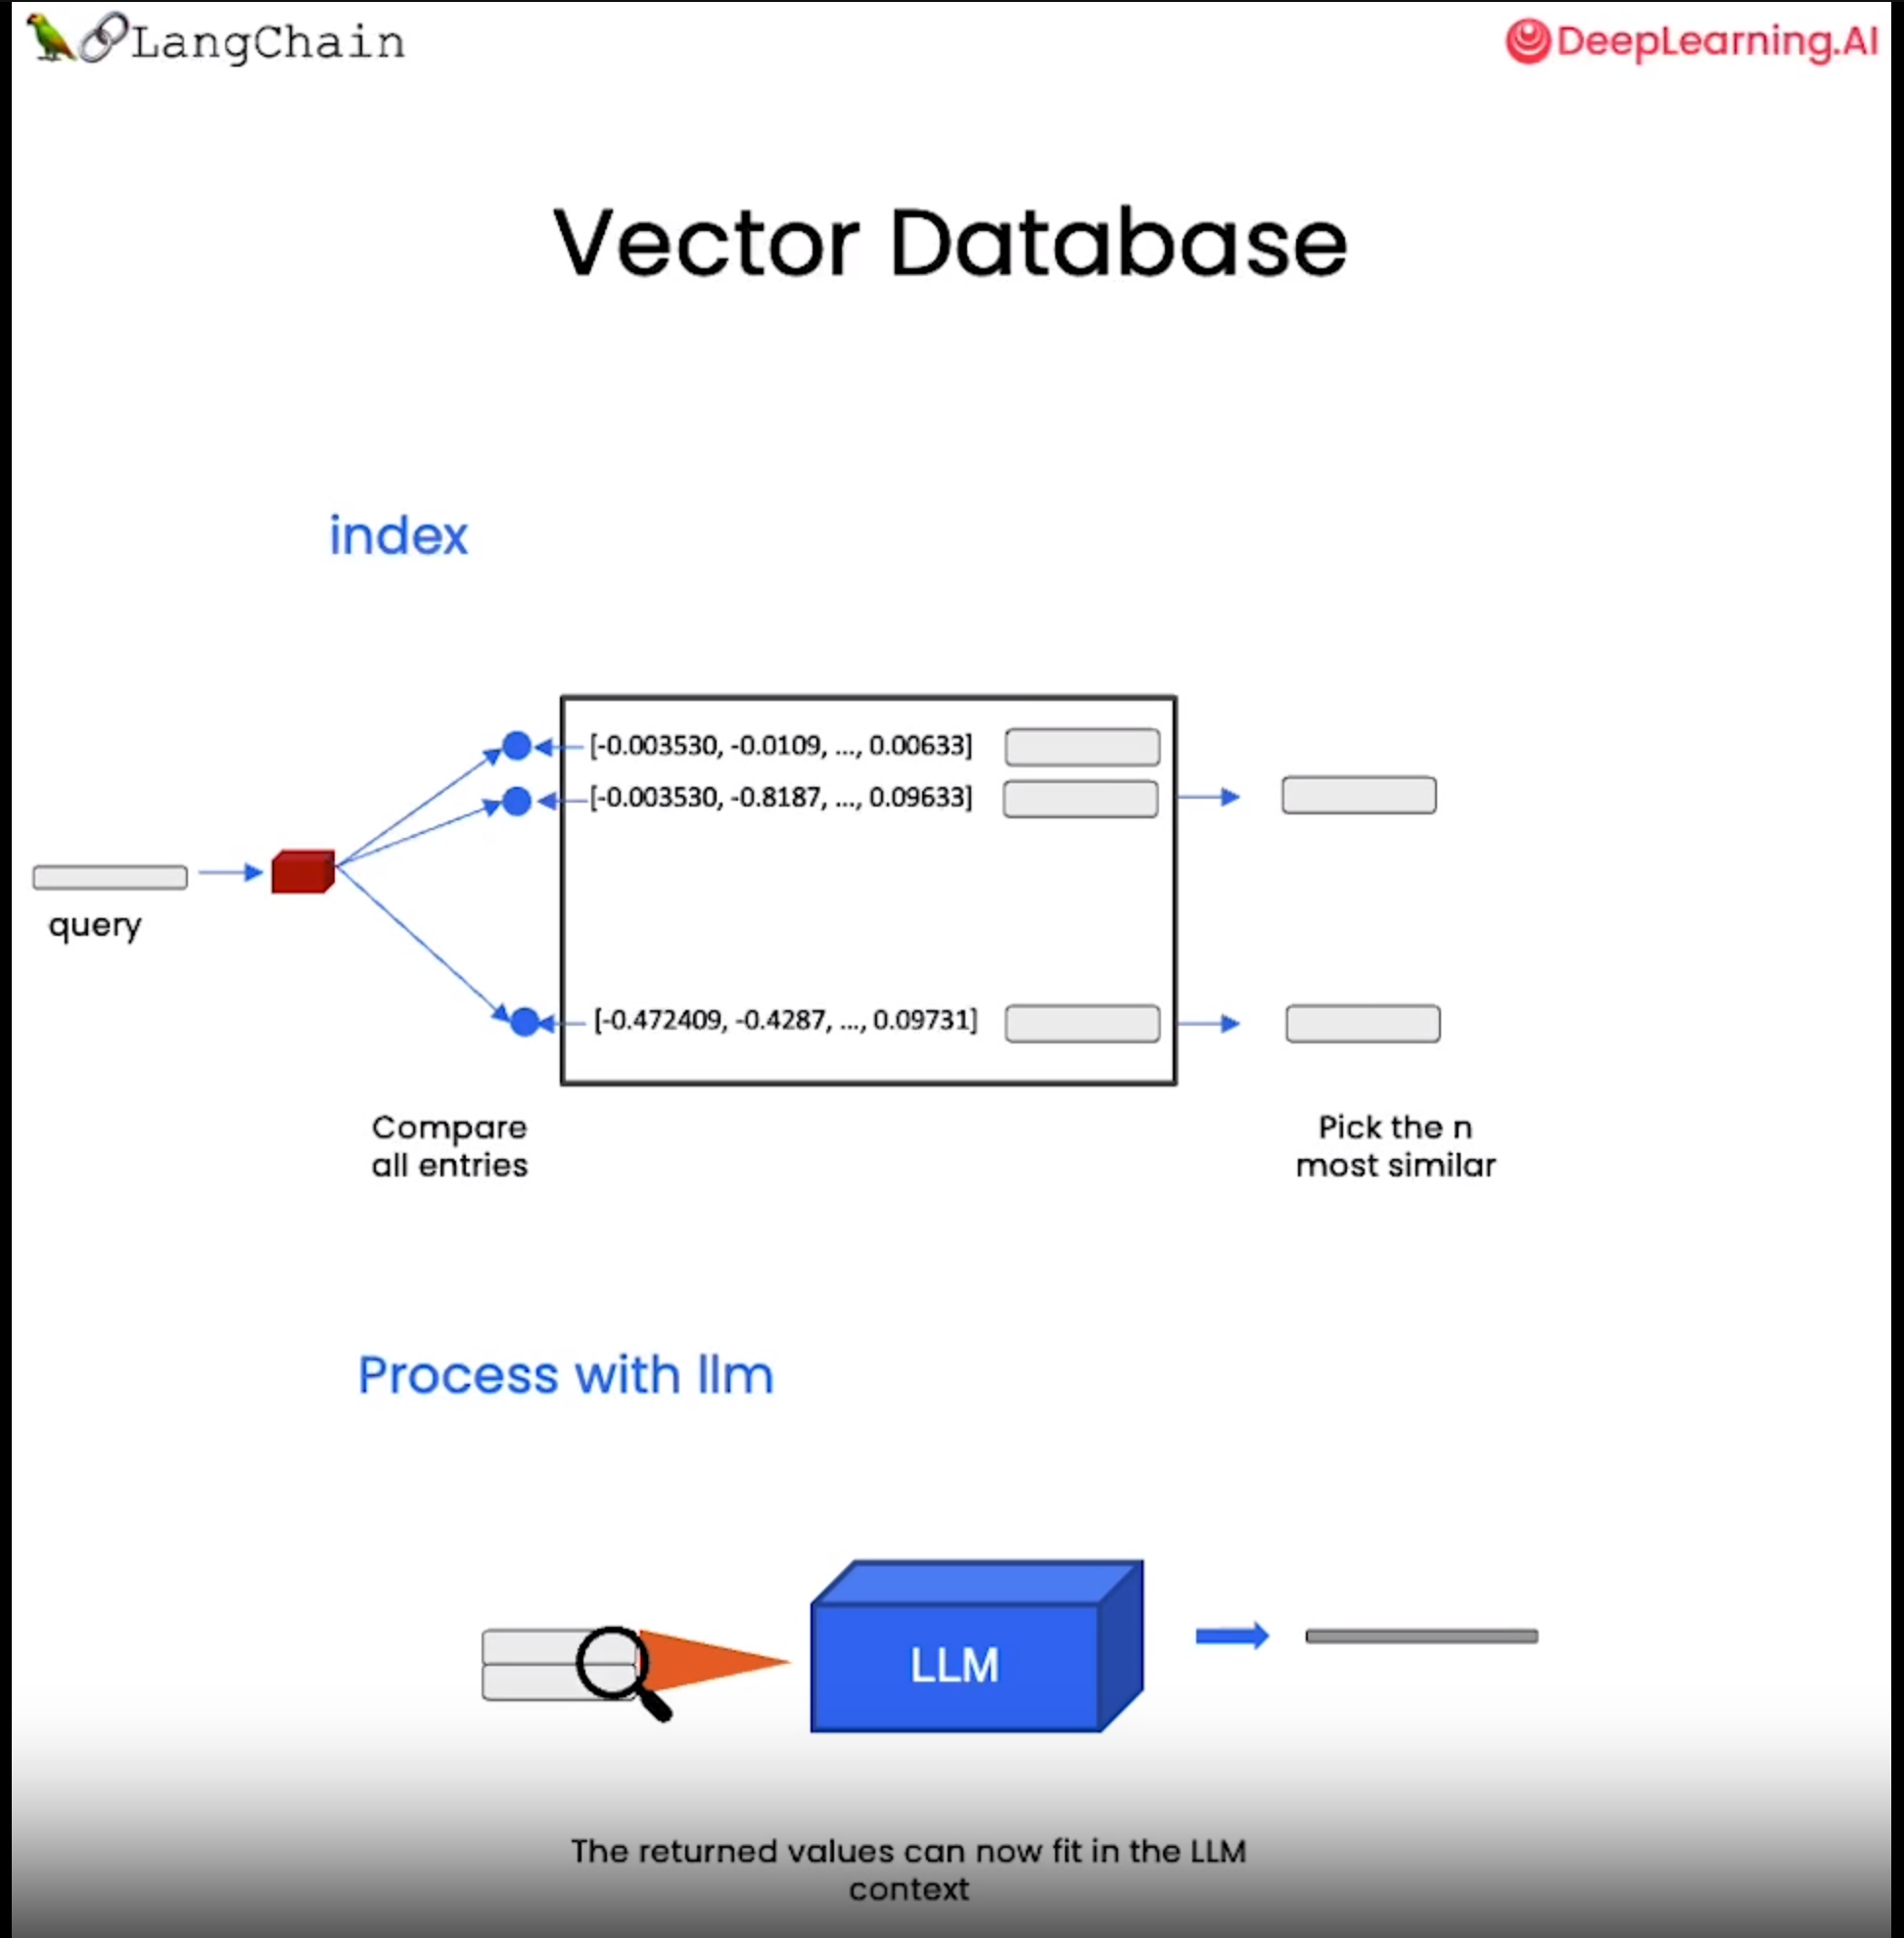

In [24]:
from langchain.embeddings import OpenAIEmbeddings
embeddings = OpenAIEmbeddings()
embed = embeddings.embed_query("Hi my name is Harrison")
print(len(embed))
print(embed[:5])

1536
[-0.021913960576057434, 0.006774206645786762, -0.018190348520874977, -0.039148248732089996, -0.014089343138039112]


In [25]:
db = DocArrayInMemorySearch.from_documents(
    docs,
    embeddings
)
query = "Please suggest a shirt with sunblocking"
docs = db.similarity_search(query)
len(docs)
docs[0]

Document(page_content=': 255\nname: Sun Shield Shirt by\ndescription: "Block the sun, not the fun – our high-performance sun shirt is guaranteed to protect from harmful UV rays. \n\nSize & Fit: Slightly Fitted: Softly shapes the body. Falls at hip.\n\nFabric & Care: 78% nylon, 22% Lycra Xtra Life fiber. UPF 50+ rated – the highest rated sun protection possible. Handwash, line dry.\n\nAdditional Features: Wicks moisture for quick-drying comfort. Fits comfortably over your favorite swimsuit. Abrasion resistant for season after season of wear. Imported.\n\nSun Protection That Won\'t Wear Off\nOur high-performance fabric provides SPF 50+ sun protection, blocking 98% of the sun\'s harmful rays. This fabric is recommended by The Skin Cancer Foundation as an effective UV protectant.', metadata={'source': 'OutdoorClothingCatalog_1000.csv', 'row': 255})

In [26]:
retriever = db.as_retriever()
llm = ChatOpenAI(temperature=0.0)
qdocs = "".join([docs[i].page_content for i in range(len(docs))])

response = llm.call_as_llm(f"{qdocs} Question: Please list all your \
shirts with sun protection in a table in markdown and summarize each one.")

display(Markdown(response))

| Name | Description |
| --- | --- |
| Sun Shield Shirt | High-performance sun shirt with UPF 50+ sun protection, moisture-wicking, and abrasion-resistant fabric. Recommended by The Skin Cancer Foundation. |
| Men's Plaid Tropic Shirt | Ultracomfortable shirt with UPF 50+ sun protection, wrinkle-free fabric, and front/back cape venting. Made with 52% polyester and 48% nylon. |
| Men's TropicVibe Shirt | Men's sun-protection shirt with built-in UPF 50+ and front/back cape venting. Made with 71% nylon and 29% polyester. |
| Men's Tropical Plaid Short-Sleeve Shirt | Lightest hot-weather shirt with UPF 50+ sun protection, front/back cape venting, and two front bellows pockets. Made with 100% polyester. |

All of these shirts provide UPF 50+ sun protection, blocking 98% of the sun's harmful rays. They also have additional features such as moisture-wicking, wrinkle-free fabric, and front/back cape venting for added comfort.

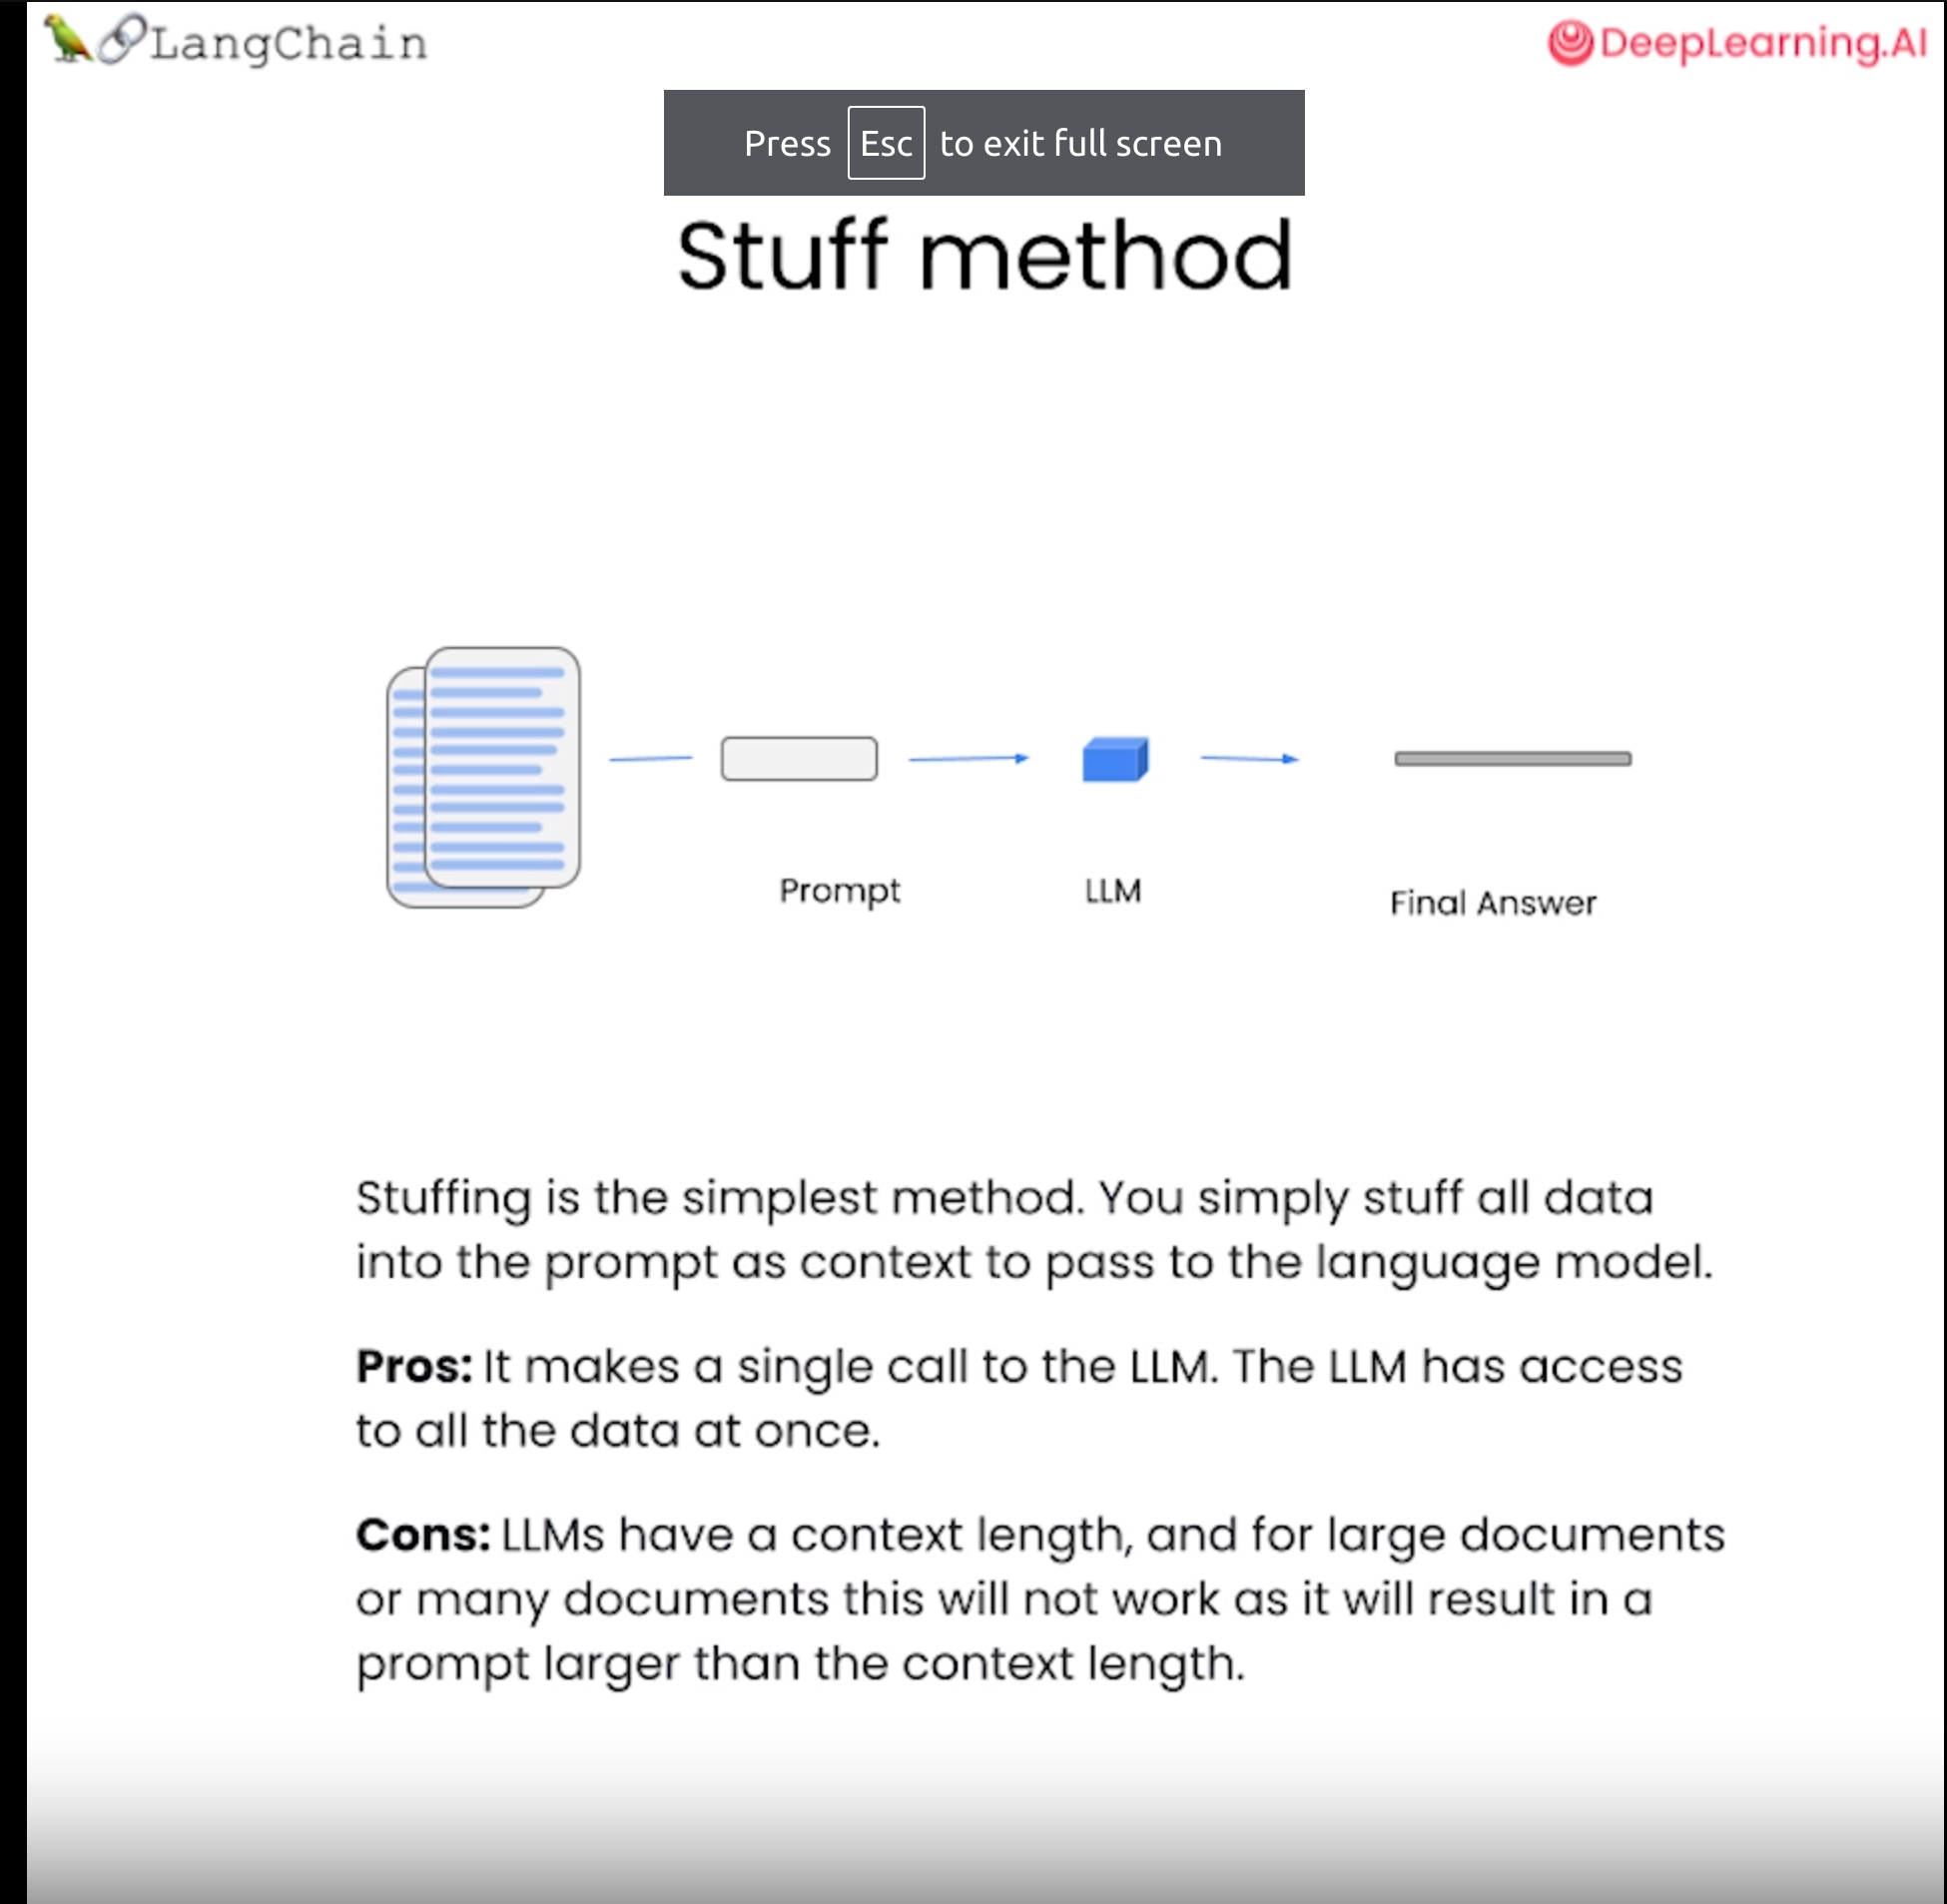

In [27]:
# Stuff based retrieval
qa_stuff = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=retriever,
    verbose=True
)

response = qa_stuff.run(query)

display(Markdown(response))



> Entering new  chain...

> Finished chain.


We have several options for shirts with sunblocking. Here are a few:

1. Sun Shield Shirt: This high-performance sun shirt is guaranteed to protect from harmful UV rays. It is made of 78% nylon and 22% Lycra Xtra Life fiber and is UPF 50+ rated.

2. Men's Plaid Tropic Shirt: This shirt is rated UPF 50+ and is great for extended travel. SunSmart technology blocks 98% of the sun's harmful UV rays, while the high-performance fabric is wrinkle-free and quickly evaporates perspiration.

3. Men's TropicVibe Shirt: This shirt has built-in UPF 50+ and is made of 71% Nylon and 29% Polyester. It is wrinkle-resistant and has front and back cape venting that lets in cool breezes.

4. Men's Tropical Plaid Short-Sleeve Shirt: This shirt is rated UPF 50+ and is made of 100% polyester. It is wrinkle-resistant and has front and back cape venting that lets in cool breezes.

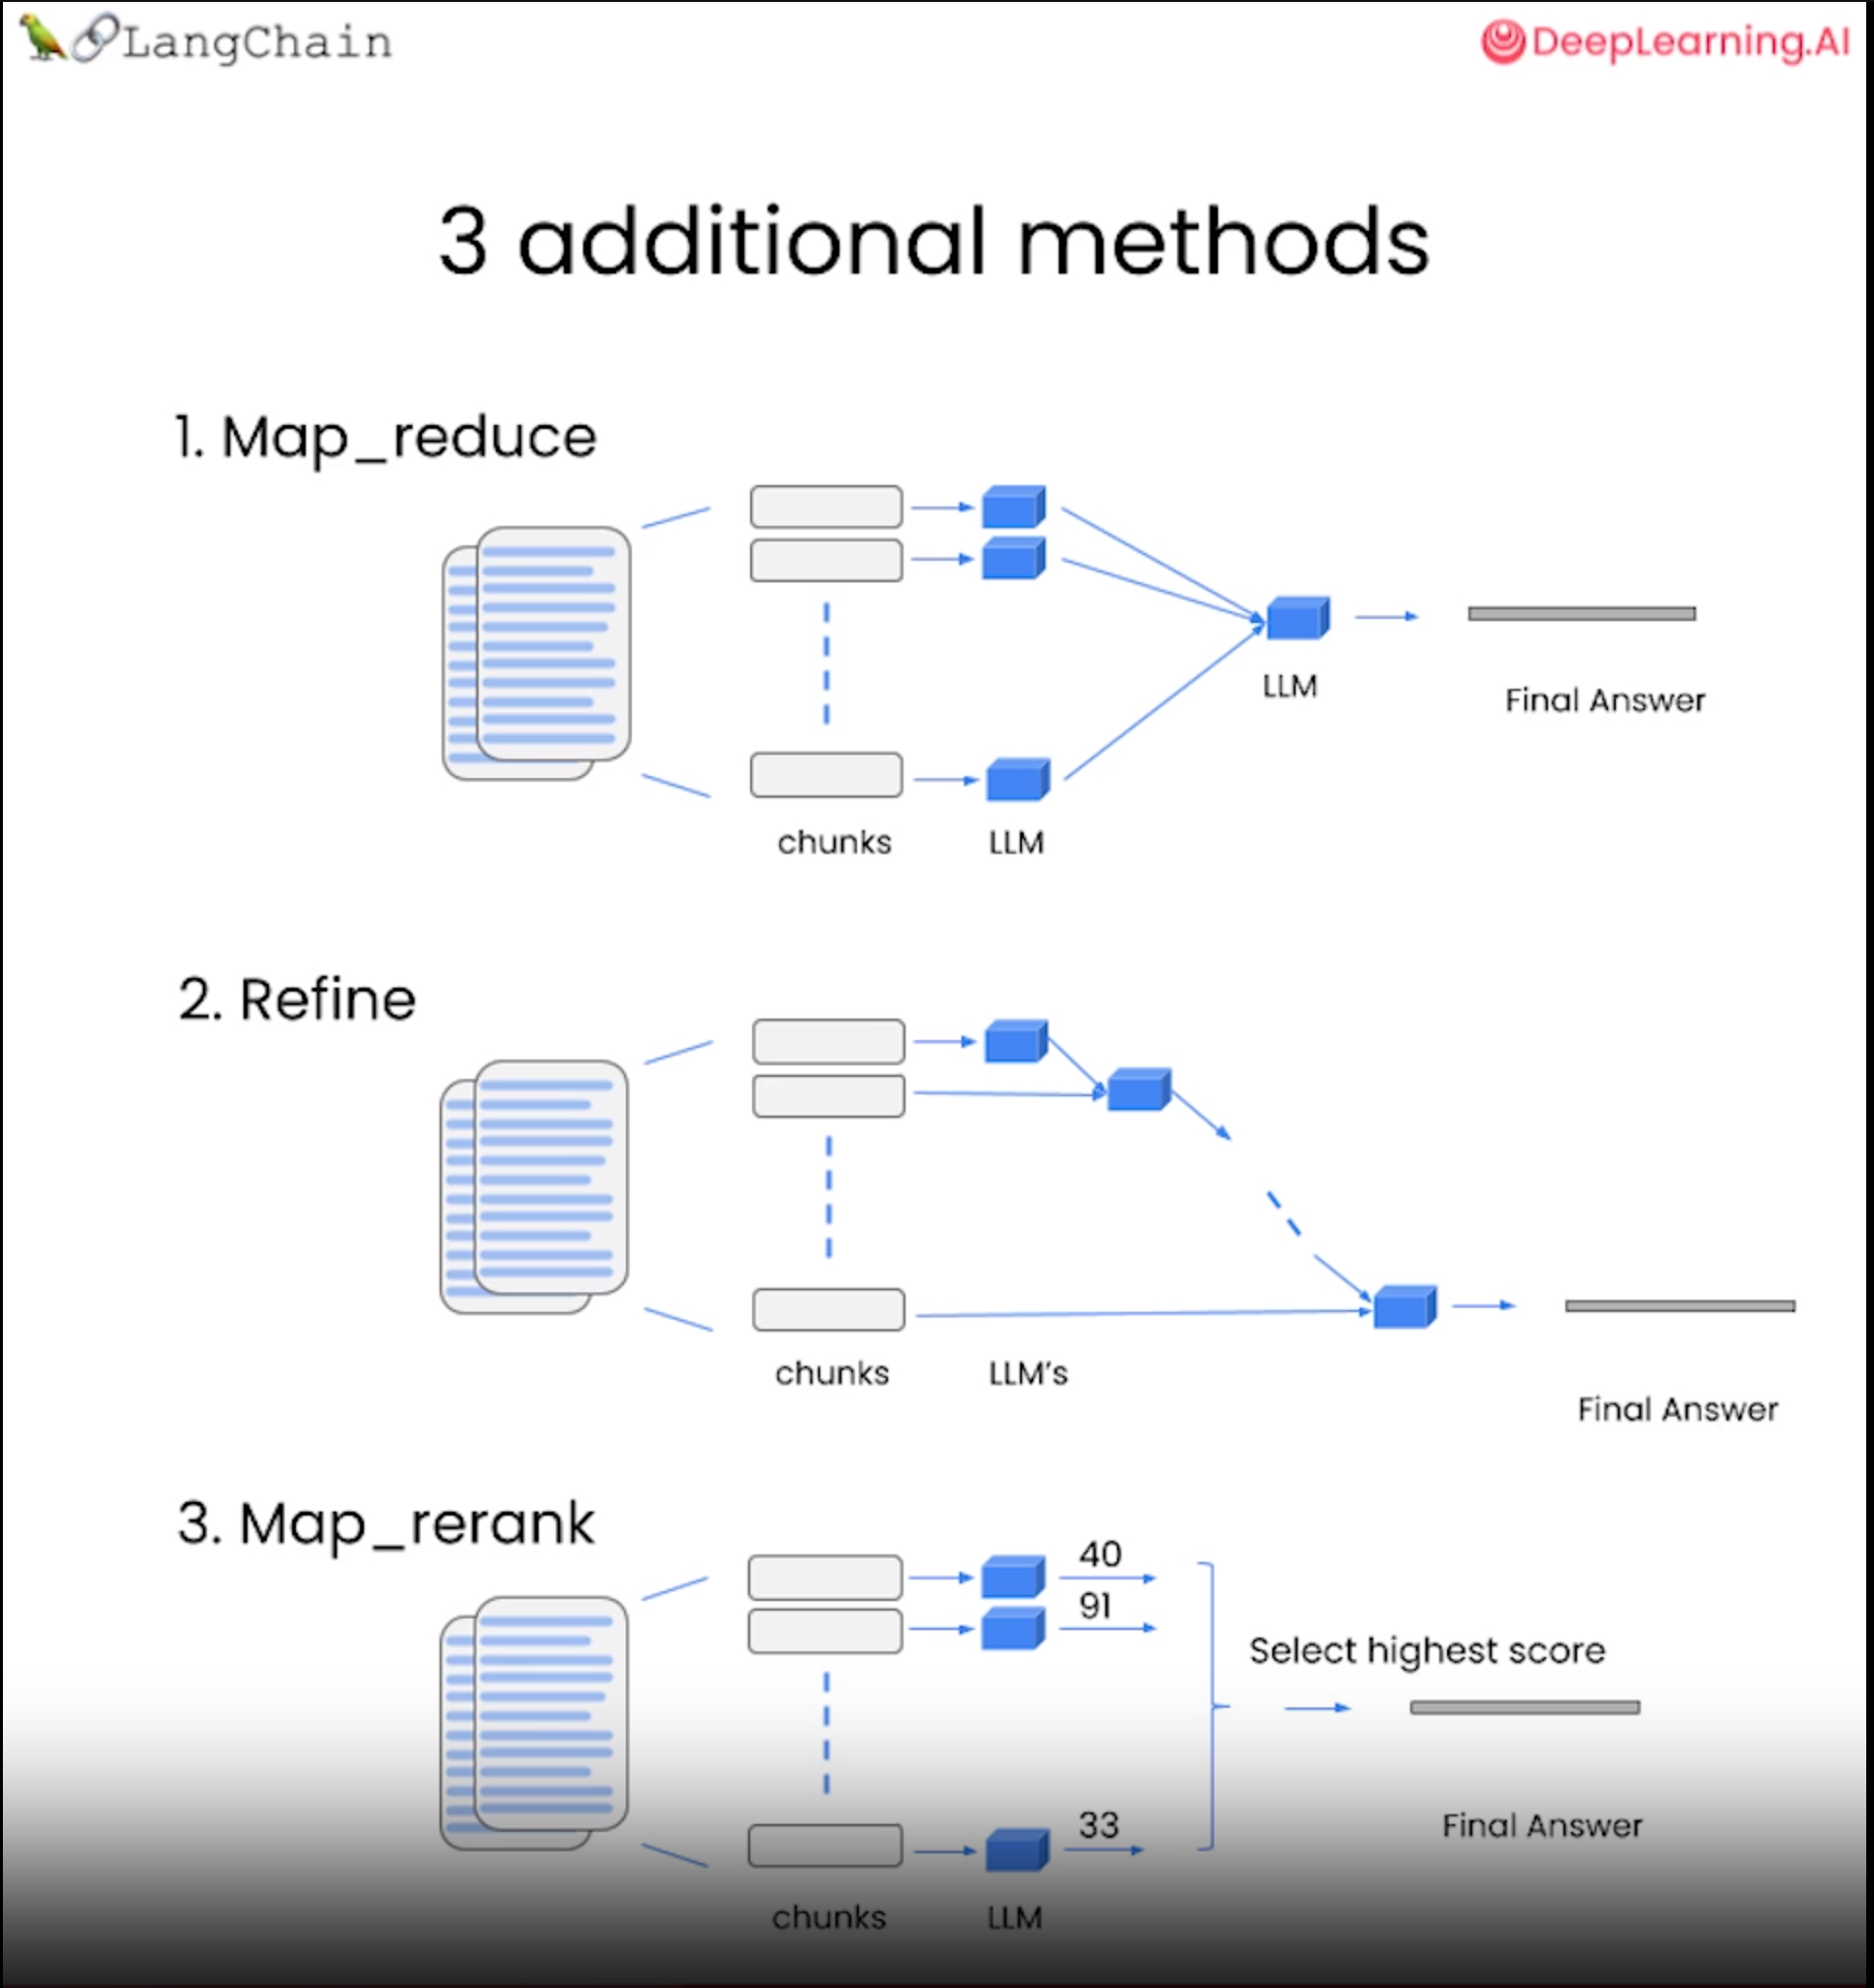

In [ ]:
index = VectorstoreIndexCreator(
    vectorstore_cls=DocArrayInMemorySearch,
    embedding=embeddings,
).from_loaders([loader])

In [28]:
response = index.query(query, llm=llm)

In [29]:
Markdown(response)

We have several options for shirts with sunblocking. Here are a few:

1. Sun Shield Shirt: This high-performance sun shirt is guaranteed to protect from harmful UV rays. It is made of 78% nylon and 22% Lycra Xtra Life fiber and is UPF 50+ rated – the highest rated sun protection possible.

2. Men's Plaid Tropic Shirt, Short-Sleeve: This shirt is rated to UPF 50+ and is great for extended travel. SunSmart technology blocks 98% of the sun's harmful UV rays, while the high-performance fabric is wrinkle-free and quickly evaporates perspiration.

3. Men's TropicVibe Shirt, Short-Sleeve: This shirt has built-in UPF 50+ and is made of 71% Nylon and 29% Polyester. It is wrinkle-resistant and has front and back cape venting that lets in cool breezes.

4. Men's Tropical Plaid Short-Sleeve Shirt: This shirt is rated UPF 50+ for superior protection from the sun's UV rays. It is made of 100% polyester and is wrinkle-resistant. It also has front and back cape venting that lets in cool breezes and two front bellows pockets.